# **Brownian Motion Simulator**
## **Contents**
1. [Introduction](#Introduction)
2. [Brownian Motion Simulator](#Brownian-Motion-Simulator)
3. [Geometric Brownian Motion Simulator](#Geometric-Brownian-Motion-Simulator)
4. [Asset Price Simulator](#Asset-Price-Simulator)
5. [Credits](#Credits)


## **Introduction**
This project aims to simulate Brownian Motions, Geometric Brownian Motions and asset prices using Python. Some of the theoretical aspects are also presented throughout, although those are not required to be known at a high level in order to appreciate the code. The `numpy`, `matplotlib.pyplot` and `seaborn` libraries will be imported under their usual aliases for use in this project. Moreover, the plot styles will be adjusted for aesthetic reasons.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

## **Brownian Motion Simulator**
Let $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ be a probability space and let $\left(W_{t}\right)_{t \in \mathbb{R}_{+}}$ be a $\mathbb{R}$-valued stochastic process on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$. The stochastic process $\left(W_{t}\right)_{t \in \mathbb{R}_{+}}$ is a *$1$-dimensional Brownian Motion* (or *Wiener process*) if and only if all of the following conditions are satisfied:
1. **Almost-sure initialisation:** $W_{0} =_{\mathbb{P}\text{-a. s.}} 0$
2. **Path-continuity:** $\forall \omega \in \Omega, \enspace W_{\cdot}(\omega) \in \mathscr{C}\left(\mathbb{R}_{+}, \mathbb{R}\right)$
3. **Increment normality:** $\forall (t,u) \in \left(\mathbb{R}_{+}\right)^2, \enspace W_{t + u} - W_{t} \hookrightarrow \mathsf{Normal}(0, u)$
4. **Increment independence:** $\forall (t,u) \in \mathbb{R}_{+} \times \mathbb{R}_{+}^{*}, \; \forall s \in [0,t[, \enspace W_{t + u} - W_{t} \perp_{\mathbb{P}} W_{s}$

It can be proven that such a stochastic process does indeed exist, although this is generally quite complicated. The existence of Wiener processes are admitted without proof in this project. An immediate consequence of the above conditions is the following: if $(W_{t})_{t \in \mathbb{R}_{+}}$ is a Wiener process on a probability space $\left(\Omega,\mathscr{F},\mathbb{P}\right)$, then:
1. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{E}(W_{t}) = 0$
2. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{V}(W_{t}) = t$
3. $\forall t \in \mathbb{R}_{+}, \enspace \mathbf{\sigma}(W_{t}) = \sqrt{t}$
4. $\forall t \in \mathbb{R}_{+}^{*},  \enspace W_{t} \hookrightarrow \mathsf{Normal}(0, t)$
5. $\forall (t, x) \in \mathbb{R}_{+}^{*} \times \mathbb{R}, \enspace f_{W_{t}}(x) = \frac{1}{\sqrt{2 \pi t}}e^{-\frac{x^2}{2t}}$

where $\mathbb{E}$, $\mathbb{V}$ and $\mathbf{\sigma}$ are the expectation, variance and standard deviation operators and $f_{W_{\cdot}}$ is the probability density function of the random variable $W_{\cdot}$.

One can simulate Wiener processes using the `brownian_motion` function defined in the cell below, depending on a specified time step, time horizon and number of Wiener processes to simulate.

In [65]:
def brownian_motion(T, dt, N):
    """
    Returns a numpy array simulating one or more Brownian Motion(s)
    """
    return np.random.normal(loc = 0, scale = np.sqrt(dt), size = (T, N))

## **Geometric Brownian Motion Simulator**
Let $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ be a probability space, let $(S_{t})_{t \in \mathbb{R}_{+}}$ be a $\mathbb{R}$-valued stochastic process on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ and let $(\mu, \sigma)$ be an ordered pair of real numbers in $\mathbb{R} \times \mathbb{R}_{+}^{*}$. The stochastic process $(S_{t})_{t \in \mathbb{R}_{+}}$ is a *Geometric Brownian Motion with percentage drift $\mu$ and percentage volatility $\sigma$* on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ if and only if there exists a Wiener process $(W_{t})_{t \in \mathbb{R}_{+}}$ on $(\Omega,\mathscr{F},\mathbb{P})$ such that:
$$\forall t \in \mathbb{R}_{+}, \enspace S_{t} =_{\mathbb{P}\text{-a.s.}} e^{\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_{t}}$$
An immediate consequence of the above conditions is the following: if $(S_{t})_{t \in \mathbb{R}_{+}}$ is Geometric Brownian Motion with percentage drift $\mu$ and percentage volatility $\sigma$ on a probability space $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ and $(W_{t})_{t \in \mathbb{R}_{+}}$ is a Wiener process on probability space $\left(\Omega,\mathscr{F},\mathbb{P}\right)$ such that the above equation holds, then:
1. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{E}(S_{t}) = e^{\mu t}$
2. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{V}(S_{t}) = e^{2\mu t}\left(e^{\sigma^2 t} - 1\right)$
3. $\forall t \in \mathbb{R}_{+}, \enspace \mathbf{\sigma}(S_{t}) = e^{\mu t}\sqrt{e^{\sigma^2 t} - 1}$
4. $\forall t \in \mathbb{R}_{+}^{*},  \enspace S_{t} \hookrightarrow \mathsf{Log\text{-}Normal}\left(\left(\mu - \frac{\sigma^2}{2}\right)t, \sigma\sqrt{t}\right)$
5. $\forall (t, x) \in \left(\mathbb{R}_{+}^{*}\right)^2, \enspace f_{S_{t}}(x) = \frac{1}{\sqrt{2\pi t} \sigma x}e^{-\frac{1}{2}\left(\frac{\ln(x) - \left(\mu - \frac{\sigma^2}{2}\right)t}{\sigma\sqrt{t}}\right)^2}$

where $\mathbb{E}$, $\mathbb{V}$ and $\mathbf{\sigma}$ are the expectation, variance and standard deviation operators and $f_{S_{\cdot}}$ is the probability density function of the random variable $S_{\cdot}$. 

One can simulate Geometric Brownian Motions using the `geometric_brownian_motion` function defined in the cell below, depending on a specified time step, time horizon, percentage drift, percentage volatility and number of Geometric Brownian Motions to simulate.

In [66]:
def geometric_brownian_motion(mu, sigma, T, dt, N):
    """
    Returns a numpy array simulating one or more Geometric Brownian Motion(s)
    """
    process = brownian_motion(T, dt, N)
    return np.exp(
        (mu - sigma ** 2 / 2) * dt + sigma * process
        )

## **Asset Price Simulator**

In general, asset prices are always positive and their returns tend to have a leptokurtic distribution (i.e., their probability distributions tend to have heavy tails). This is one of the reasons why they are sometimes represented as Geometric Brownian Motions, where the percentage drift is the expected return across a given time horizon, and the percentage volatility is the standard deviation of returns across time horizons. They can be simulated from a given initial price (sometimes denoted $S_{0}$) using the `asset_price` function defined in the cell below:

In [67]:
def asset_price(S0, mu, sigma, T, dt, N):
    """
    Returns a numpy array simulating one or more asset price
    """
    returns = geometric_brownian_motion(mu, sigma, T, dt, N)
    stacked = np.vstack([np.ones(N), returns])
    return S0 * stacked.cumprod(axis=0)

To visualise the result using Python, suppose that one is working with an asset whose price (in USD, say) varies as per a Geometric Brownian Motion $(S_{t})_{t \in \mathbb{R}_{+}}$ on some probability space $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ satisfying the following properties:
- At time $0$, the asset costs $\$100$, that is: $S_{0} =_{\mathbb{P}{\text{-a.s.}}} 100$.
- The asset has an expected return of $35\%$ over the time horizon under consideration: $\mu = 0.35$.
- The asset has a volatility of $25\%$ over the time horizon under consideration: $\sigma = 0.25$.
- The time horizon (in days) under consideration is five trading years: $T = 5 \times 252 = 1260$.
- The time step (in days) under consideration is one day: $\Delta t = \frac{1}{252}$.
- The number of simulations desired to run is $1000$: $N = 1000$.

then one can set $\left(S_{0}, \mu, \sigma, T, \Delta t, N\right) = \left(100, 0.25, 0.35, 1260, \frac{1}{252}, 1000\right)$ as the argument vector of the `asset_price` function to generate and plot the simulated price paths as in the cell below:

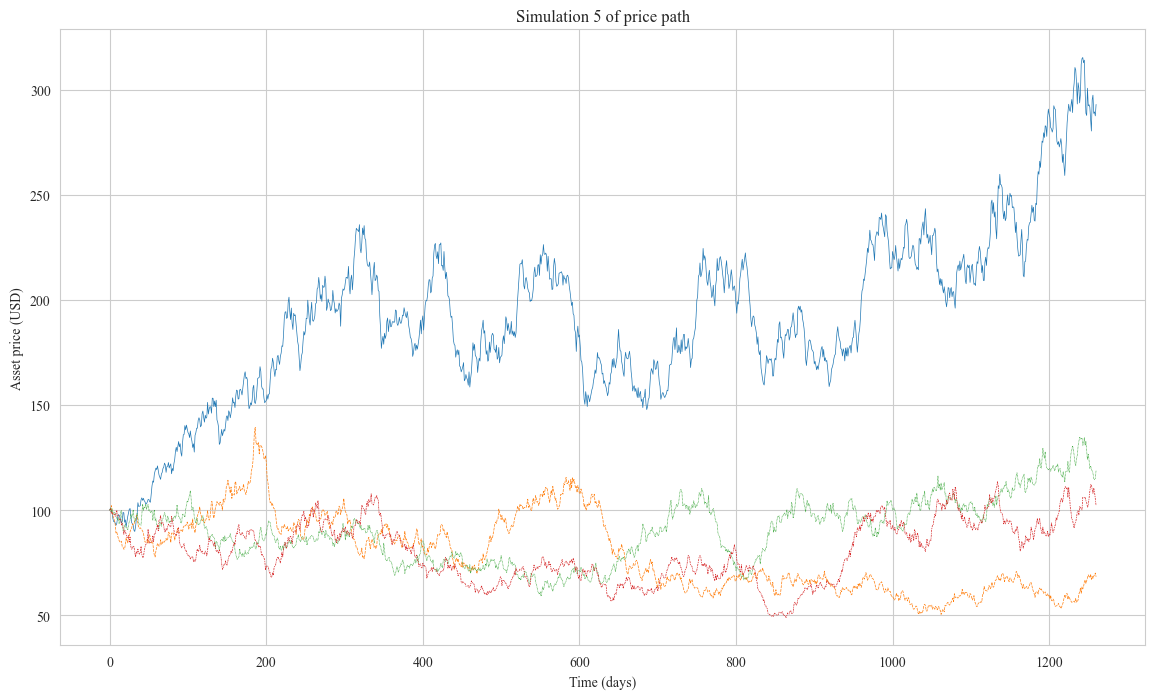

In [68]:
# setup params for brownian motion
S0 = 100
mu = 0.25
sigma = 0.35
T = 1260
dt = 1 / 252
N = 1000
index = 4
price_paths = asset_price(S0, mu, sigma, T, dt, N)
fig, ax = plt.subplots(figsize = (14, 8))
sns.lineplot(data = price_paths[:, 0:index], linewidth=0.5, legend=None)
ax.set(xlabel = "Time (days)", ylabel = "Asset price (USD)", title = f"Simulation {index + 1} of price path")
plt.show()

## **Credits**
- “Geometric Brownian Motion.” 2022. University of Alabama in Huntsville. April 24, 2022. https://stats.libretexts.org/@go/page/10406.
- Wikipedia contributors, "Log-normal distribution," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Log-normal_distribution&oldid=1199211330 (accessed February 9, 2024).
- Wikipedia contributors, "Wiener process," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Wiener_process&oldid=1190944087 (accessed February 9, 2024).
- The original code is provided by Jason Strimpel, of PyQuant News. However, it has been modified for the purposes of this project.